In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from licensing import LicensingData
from realestate import RealEstateData
from citymap import CityMap

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# read and preprocess licensing data, then save to hdf
#licensing = LicensingData()
#licensing.save()

# query realestate data from zillow api
#RealEstateData.download(df['ZIP CODE'].unique())

# Load Data

In [12]:
licenses = LicensingData.load()

In [30]:
mvalfah = pd.concat(RealEstateData(), axis=1)#.loc[:, common_zipcodes].resample('3M').mean()

In [ ]:
from functools import reduce

# TEMPORARY: limit analysis to zipcodes available in all three datasets
keys = (chimap.zipcodes, realestate.zipcodes, licensing['ZIP CODE'].unique())
common_zipcodes = reduce(lambda x,y: np.intersect1d(x,y), keys)
licensing = licensing[licensing['ZIP CODE'].isin(common_zipcodes)]
price_matrix = pd.concat(realestate, axis=1).loc[:, common_zipcodes].resample('3M').mean()

# Plot maps

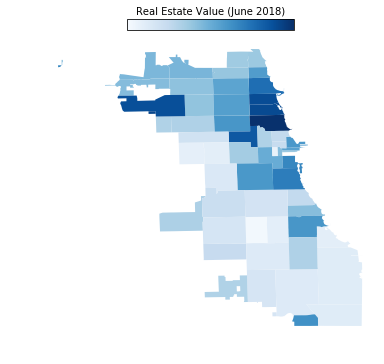

In [31]:
date = 'June 2018'
chimap = CityMap(mvalfah, vmin='min', vmax='max', timeline=False, label='Real Estate Value ({:s})'.format(date))
chimap.fix_date(date)

In [ ]:
chimap = ChicagoMap(timeseries=derivative, 
                    cbar=True, figsize=(6, 6), 
                    vmin=-0.2, vmax=0.2, 
                    cmap=plt.cm.seismic, label='Rate of Real Estate Value Change')

# Animated choropleths

In [979]:
# save animated price derivative map
chimap.animate('./chicago/derivates.mp4')

In [24]:
%%HTML
<video width="640" height="480" controls>
  <source src="./videos/derivates.mp4" type="video/mp4">
</video>

# Licensing Data

In [985]:
import numpy as np

# identify newly issued licenses
new = licensing[np.logical_and(licensing['APPLICATION TYPE']=='ISSUE', licensing['LICENSE STATUS'] == 'AAI')]
renewed = licensing[np.logical_and(licensing['APPLICATION TYPE']!='ISSUE', licensing['LICENSE STATUS'] == 'AAI')]
failed = licensing[licensing['LICENSE STATUS'] != 'AAI']

In [988]:
# TO DO: expired and not renewed licenses?
criteria = ['DATE ISSUED', 'ZIP CODE', 'LICENSE CODE']
additions = new.groupby(criteria).size().groupby(level=[0, 1]).sum().unstack(level=1).resample('3M', axis=0).sum()
renewals = renewed.groupby(criteria).size().groupby(level=[0, 1]).sum().unstack(level=1).resample('3M', axis=0).sum()

In [1058]:
freq = '3Y'
annual_additions = additions.resample(freq, axis=0).sum()
annual_renewals = renewals.resample(freq, axis=0).sum()

In [ ]:
new_2013[new_2013['LICENSE CODE']==1010]['LICENSE DESCRIPTION']
new_2013.groupby('LICENSE CODE').count()

Text(0, 0.5, 'License Additions')

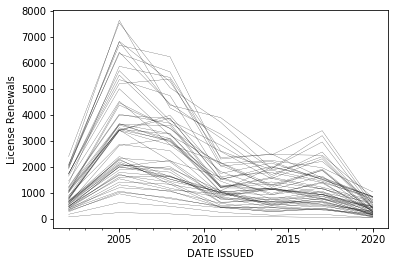

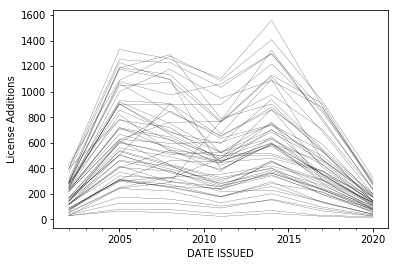

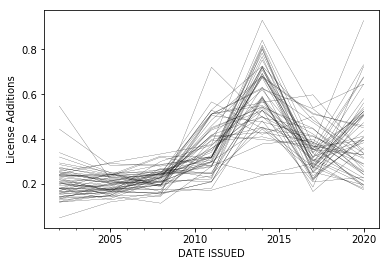

In [1059]:
fig, ax = plt.subplots()
annual_renewals.plot(ax=ax, legend=False, color='k', lw=0.2)
ax.set_ylabel('License Renewals')

fig, ax = plt.subplots()
annual_additions.plot(ax=ax, legend=False, color='k', lw=0.2)
ax.set_ylabel('License Additions')

turnover = annual_additions/annual_renewals

fig, ax = plt.subplots()
turnover.plot(ax=ax, legend=False, color='k', lw=0.2)
ax.set_ylabel('License Additions')


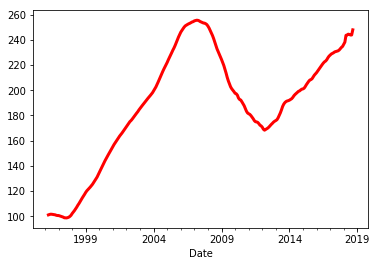

In [29]:
fig, ax = plt.subplots()

pricing_trend.plot(ax=ax, color='r', lw=3)

In [ ]:
mvalfah = 

In [33]:
from scipy.signal import savgol_filter
import numpy as np

In [65]:
def normalize_by_baseline(timeseries, baseline_length=4):
    baseline = timeseries.iloc[:baseline_length].mean(axis=0)
    normalized_timeseries = np.log2(timeseries / baseline)
    normalized_timeseries = normalized_timeseries.iloc[baseline_length:, :]
    return normalized_timeseries

def detrend(timeseries):
    trend = timeseries.mean(axis=1)
    return timeseries.subtract(trend, axis=0)

def ptp(timeseries):
    return timeseries.max(axis=0) - timeseries.min(axis=0)

def differentiate(timeseries, window_size=3, polyorder=1):
    return timeseries.diff(axis=0, periods=1).apply(savgol_filter, axis=0, args=(window_size, polyorder))

In [69]:
# normalize and detrend realestate value data
detrended_mvalfah = detrend(normalize_by_baseline(mvalfah, baseline_length=4))

# evaluate rate of change
mvalfah_rate_of_change = differentiate(detrended_mvalfah)

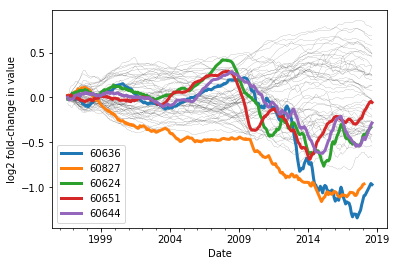

In [74]:
fig, ax = plt.subplots()
detrended_mvalfah.plot(ax=ax, legend=False, color='k', lw=0.1)
ax.set_ylabel('log2 fold-change in value')

N = 5
top_N = ptp(detrended_mvalfah).sort_values(ascending=False).iloc[:N]
detrended_mvalfah.loc[:, top_N.index].plot(ax=ax, lw=3)

In [ ]:
"""
Hypotheses:

- Retention rate of business licenses as an indicator? E.g. business turnover is bad
- Introduction of new businesses as an indicator
- Type of new businesses being introduced
- Licenses for entertainment, street festivals, alcohol, etc 
- Spatiotemporal clustering with adjacent zipcodes

"""